In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

len(X_train)

11490434/11490434 [==============================] - 3s 0us/step


60000

In [2]:
len(X_test)

10000

In [3]:
X_train[0].shape

(28, 28)

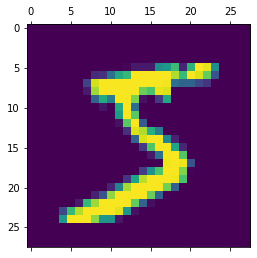

In [4]:
plt.matshow(X_train[0])

In [5]:
X_train = X_train / 255
X_test = X_test / 255  #normalized (0 to 1)

In [6]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [7]:
X_train_flattened.shape

(60000, 784)

In [8]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4736 - accuracy: 0.8756
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9243
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9257


In [9]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9272


[0.26455533504486084, 0.9272000193595886]

In [10]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.8407710e-02, 2.3872613e-07, 1.0166750e-01, 9.4822878e-01,
       2.7341738e-03, 1.1173557e-01, 1.3996897e-06, 9.9981678e-01,
       1.2431789e-01, 6.5900111e-01], dtype=float32)

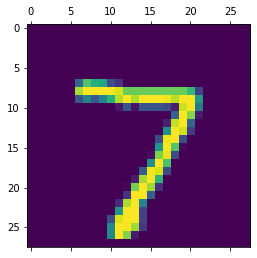

In [11]:
plt.matshow(X_test[0])

In [12]:
np.argmax(y_predicted[0])

7

In [13]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [14]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   4,    6,  933,   16,    9,    3,   13,    9,   36,    3],
       [   2,    0,   19,  923,    1,   24,    2,   10,   21,    8],
       [   1,    1,    6,    1,  915,    0,    9,    4,   10,   35],
       [   8,    3,    5,   31,    9,  784,   12,    6,   28,    6],
       [  11,    3,    8,    1,    7,   13,  909,    2,    4,    0],
       [   1,    5,   25,    7,    9,    1,    0,  944,    2,   34],
       [   5,    6,    6,   20,    9,   23,    9,   12,  877,    7],
       [   9,    7,    2,   10,   27,    8,    0,   23,    6,  917]])>

Text(69.0, 0.5, 'Truth')

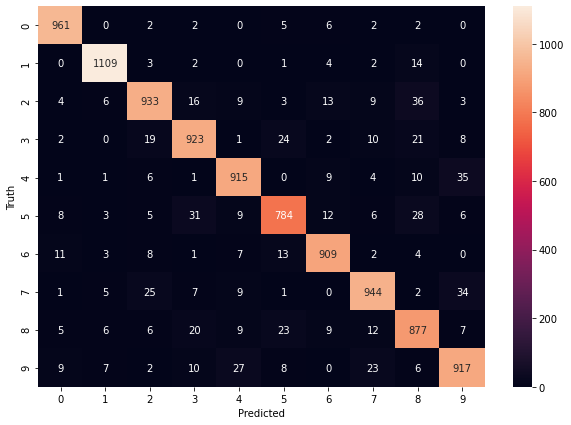

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
#Using hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2705 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1242 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0860 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0523 - accuracy: 0.9839


In [18]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9758


[0.07699548453092575, 0.9757999777793884]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

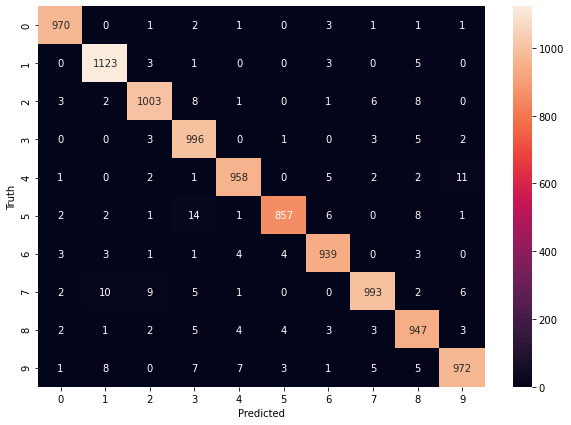

In [19]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [20]:
# Using Flatten layer so that we don't have to call .reshape on input dataset
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2729 - accuracy: 0.9225
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1228 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0847 - accuracy: 0.9751
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0654 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0513 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0342 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0283 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.018

In [21]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0947 - accuracy: 0.9731


[0.0946602076292038, 0.9731000065803528]